## “Why did you choose your methodology?”

## “How was this implemented?”

## “Why does this work?”

## “How did you verify results?”

## “Why is this method superior to what is used in the industry?”

## 1.1 Loading Data

In [1189]:
import numpy as np
import math as math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.figure_factory import create_distplot
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot

%matplotlib inline
plotly.offline.init_notebook_mode(connected=True)

In [1190]:
housingdf = pd.read_csv('./Datasets/train.csv')
housingdf = housingdf.drop(['Id'], axis = 1)

In [1191]:
testdf = pd.read_csv('./Datasets/test.csv')
testdf = testdf.drop(['Id'], axis = 1)

In [1192]:
print(housingdf.shape)
print(testdf.shape)

(1460, 80)
(1459, 79)


In [1193]:
housingdf.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [1194]:
testdf.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [1195]:
totaldf = pd.concat([housingdf, testdf], axis = 0, ignore_index = False)


In [1196]:
#making a copy
totalhousing = totaldf.copy()

In [1197]:
#drop the response variable
housingtrainy = housingdf[['SalePrice']]
totalhousing = totalhousing.drop(['SalePrice'], axis = 1)

In [1198]:
totalhousing.shape

(2919, 79)

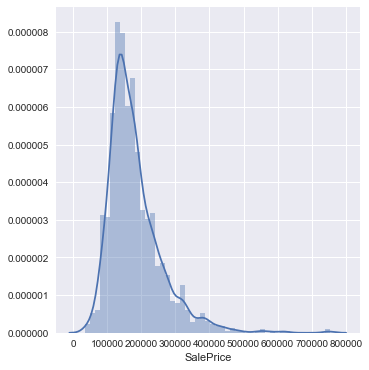

In [1199]:
plt.style.use('seaborn')
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
plt.subplot(1, 2, 1)
sns.distplot(housingdf['SalePrice'])


In [1200]:
hist_data = [np.array(np.log1p(housingdf['SalePrice']))]
group_labels = ['Log Sales Price Distribution']
fig = ff.create_distplot(hist_data, group_labels, bin_size=.1)
py.offline.iplot(fig, filename='Basic Distplot')

## 2.1 Imputation & Visualization

In [1201]:
import missingno as msno
%matplotlib inline

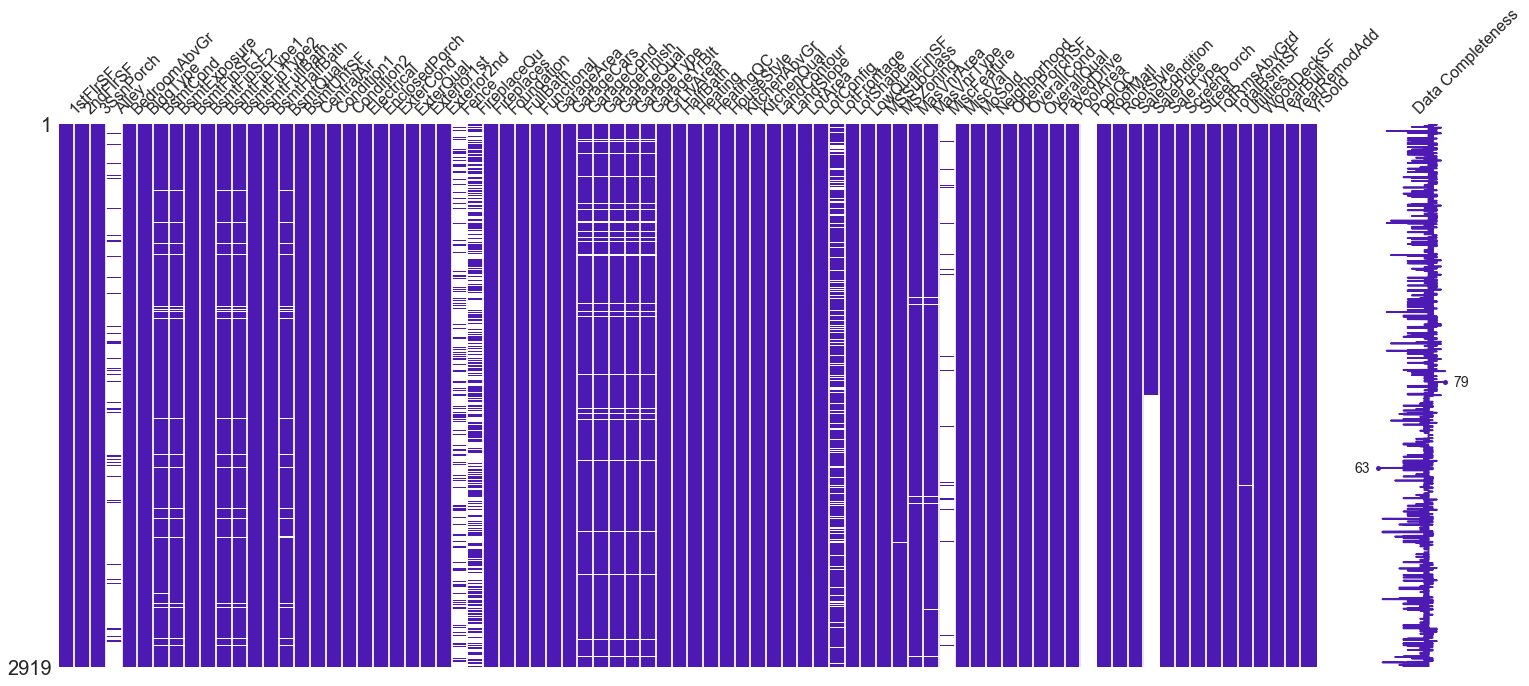

In [1202]:
#overall missing data visualization
msno.matrix(totaldf, color=(0.3, 0.1, 0.7), labels = True)

In [1203]:
missingcolumns = totalhousing.isnull().sum().sort_values(ascending = False)
missingpercentage = (totalhousing.isnull().sum()/len(totaldf)).sort_values(ascending = False)
missingdf = pd.DataFrame({'missing_column': missingcolumns.index.tolist(), 'missing_numbers': missingcolumns.values.tolist(), 'missing_percentage': missingpercentage.values.tolist()})
missingdf = missingdf[missingdf['missing_numbers']>0]
missingdf



,missing_column,missing_numbers,missing_percentage
0,PoolQC,2909,0.996574
1,MiscFeature,2814,0.964029
2,Alley,2721,0.932169
3,Fence,2348,0.804385
4,FireplaceQu,1420,0.486468
5,LotFrontage,486,0.166495
6,GarageFinish,159,0.054471
7,GarageQual,159,0.054471
8,GarageYrBlt,159,0.054471
9,GarageCond,159,0.054471


In [1204]:
#missing data with barplots

missing_counts = go.Bar(x=missingdf['missing_column'].tolist(),
                  y=missingdf['missing_numbers'].tolist(),
                  marker=dict(color='rgb(166,206,227)'))


data = [missing_counts]

layout = go.Layout(title="Missing Data Counts",
                xaxis=dict(title='Missing Columns',tickangle=30),
                yaxis=dict(title='Counts'))

fig = go.Figure(data=data, layout=layout)

py.offline.iplot(fig)





In [1205]:
#missing data with barplots

missing_percentage = go.Bar(x=missingdf['missing_column'].tolist(),
                  y=missingdf['missing_percentage'].tolist(),
                  marker=dict(color='rgb(166,206,227)'))


data = [missing_percentage]

layout = go.Layout(title="Missing Data Percentage",
                xaxis=dict(title='Missing Columns',tickangle=30),
                yaxis=dict(title='Missing Percentage'))

fig = go.Figure(data=data, layout=layout)

py.offline.iplot(fig)




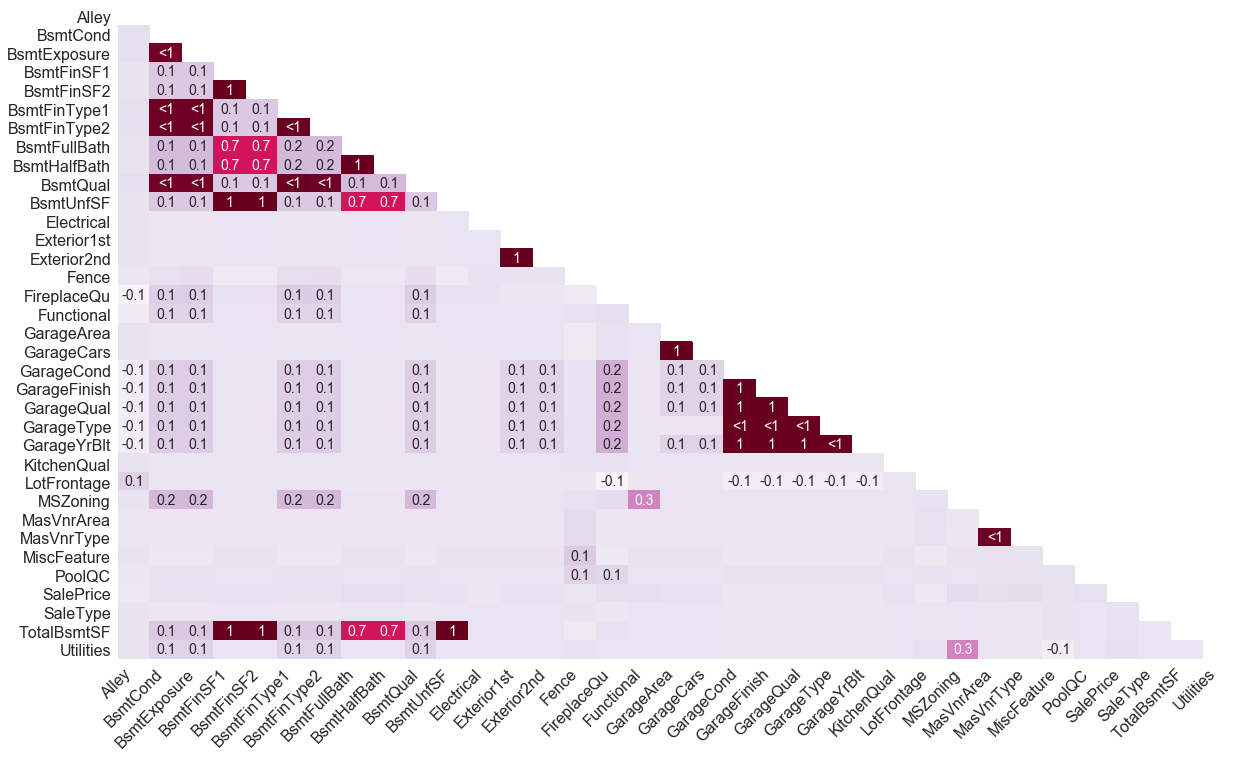

In [1206]:
#correlation between missing data
msno.heatmap(totaldf, cmap = 'PuRd')

In [1207]:
totaldf.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'PoolQC',

In [1208]:
totalmissingdf = totaldf[missingdf['missing_column'].tolist()]

## 2.2 Garage Year Imputation

In [1209]:
# totalhousing.GarageYrBlt = np.where(totalhousing.GarageYrBlt != totalhousing.GarageYrBlt, totalhousing.YearBuilt, totalhousing.GarageYrBlt)
# Example
# a = np.array([2,2,0,6,8])
# b = np.array([np.nan,3,np.nan,4,5])
# c = np.array([0,0,0,0,0])
# d = np.array([1,1,1,1,1])
# np.where(np.isnan(b), a, b)



In [1210]:
totalhousing['HasGarage'] = np.where(np.isnan(totalhousing['GarageYrBlt']), 0, 1)



In [1211]:
#some of garage year built are earlier than year built, causing negative numbers, should come back and impute
totalhousing['GarageYearDiff'] = totalhousing['GarageYrBlt'] - totalhousing['YearBuilt']
# totalhousing['GarageYearDiff'] = [0 if math.isnan(i) else i for i in totalhousing['GarageYearDiff']]
totalhousing['GarageYearDiff'] = np.where(np.isnan(totalhousing['GarageYearDiff']), 0, totalhousing['GarageYearDiff'])
totalhousing['GarageYearDiff'] = np.where(totalhousing['GarageYearDiff'] < 0, 0, totalhousing['GarageYearDiff'])
totalhousing['GarageYearDiff'] = np.where(totalhousing['GarageYearDiff'] == 201, 1, totalhousing['GarageYearDiff'])
pd.unique(totalhousing['GarageYearDiff'])



array([   0.,   83.,   62.,   54.,    1.,    2.,   51.,    7.,   15.,
         69.,    5.,   35.,   56.,   14.,   20.,   40.,   48.,   50.,
         12.,   78.,  101.,   17.,    3.,   18.,    4.,   29.,   45.,
         26.,   11.,   53.,   88.,  123.,   21.,   38.,   77.,   44.,
         32.,   22.,   13.,   70.,   85.,   33.,   58.,    6.,    8.,
         27.,   74.,   37.,   95.,   43.,   42.,    9.,   57.,   36.,
         47.,   59.,   99.,   64.,  106.,   24.,   19.,   10.,   34.,
         49.,   41.,   46.,   79.,   31.,   73.,   30.,   87.,   52.,
         72.,   39.,   75.,   60.,   93.,   89.,   98.,   16.,   86.,
         71.,  113.,   55.,   28.,   25.,   65.,   61.,   67.,   68.,
         80.,   23.,  100.,   82.,   91.])

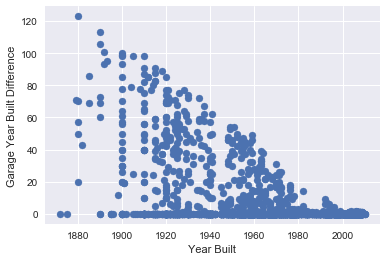

In [1212]:
#Visualize garage year imputation
plt.scatter(totalhousing['YearBuilt'], totalhousing['GarageYearDiff'])
plt.xlabel('Year Built')
plt.ylabel('Garage Year Built Difference')
matplotlib.rcParams['figure.figsize'] = (10, 10)



## 2.3 Year Remodeling Imputation

In [1213]:
#create a column to check if the remodeled year is equal to year built
totalhousing['IsRemod'] = np.where(totalhousing['YearRemodAdd'] == totalhousing['YearBuilt'], 0, 1)


In [1214]:
#create a column to store the year difference between every remodelling year and year built
totalhousing['RemodYearDiff'] = totalhousing['YearRemodAdd'] - totalhousing['YearBuilt']
totalhousing['RemodYearDiff'] = np.where(totalhousing['RemodYearDiff'] < 0, 0, totalhousing['RemodYearDiff'])
pd.unique(totalhousing['RemodYearDiff'])

array([  0,   1,  55,   2,  19,  11,  72,   7,  20,  33,  49,  40,  23,
        30,  36,  54,   5,  88,  16,   6,  76,  29,  24,  35,  53,  71,
        67,  85, 110,  86,  18,  57,  47,  43,  25,  62,  14,  15,  27,
        26,  78,  59,  38,   9,  51,  83, 101,  32,   3,  39,  10,  52,
        50,   8,  48,  79,  58,  82,  17, 122,  65,  34,  75,  60,  42,
        77,  28,  22,  61,  46,  89,  80,  13,  63,  90,  70,  37, 100,
        44,   4,  81, 107,  21,  64, 111,  69,  31,  68,  96, 108,  56,
        92, 123,  94,  45,  87,  41,  74,  98,  12, 103, 106,  93, 104,
        73, 121, 115,  95,  84, 112,  97, 127, 109,  66, 116, 105])

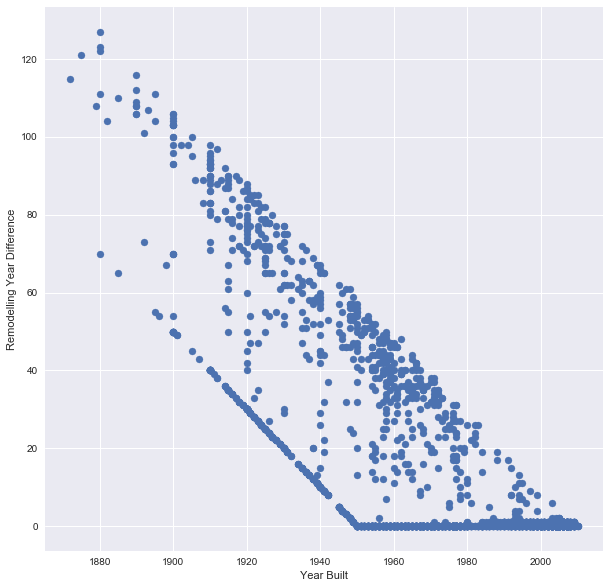

In [1215]:
#Visualize year remodeling imputation
plt.scatter(totalhousing['YearBuilt'], totalhousing['RemodYearDiff'])
plt.xlabel('Year Built')
plt.ylabel('Remodelling Year Difference')
matplotlib.rcParams['figure.figsize'] = (10, 10)

## 2.4 Ordinal Variable Imputation

In [1216]:
ordinal1 = ["LotShape","LandContour", "LandSlope", "BldgType", "OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", 
           "BsmtFinType2", "HeatingQC", "CentralAir", "KitchenQual", "Functional", "FireplaceQu", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", "Fence", 'PoolQC']


In [1217]:
for i in ordinal1:
    totalhousing[i] = totalhousing[i].fillna(totalhousing[i].mode()[0])

In [1218]:
totalhousing[ordinal1].isnull().sum()

LotShape        0
LandContour     0
LandSlope       0
BldgType        0
OverallQual     0
OverallCond     0
ExterQual       0
ExterCond       0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
HeatingQC       0
CentralAir      0
KitchenQual     0
Functional      0
FireplaceQu     0
GarageFinish    0
GarageQual      0
GarageCond      0
PavedDrive      0
Fence           0
PoolQC          0
dtype: int64

## 2.5 Nominal Variable Imputation

In [1219]:
nominal1 = ['MiscFeature', 'Alley', 'GarageType', 'MasVnrType']


In [1220]:
totalhousing[nominal] = totalhousing[nominal].replace(np.nan, 'None')

In [1221]:
nominal2 = ['MSZoning', 'Utilities', 'SaleType', 'Exterior1st', 'Exterior2nd', 'Electrical']

In [1222]:
for i in nominal2:
    totalhousing[i] = totalhousing[i].fillna(totalhousing[i].mode()[0])

In [1223]:
totalhousing[nominal2].isnull().sum()

MSZoning       0
Utilities      0
SaleType       0
Exterior1st    0
Exterior2nd    0
Electrical     0
dtype: int64

## 2.6 Continuous Variable Imputation

In [1224]:
continuous1 = ['LotFrontage', 'MasVnrArea', 'BsmtHalfBath', 'BsmtFullBath', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1', 'TotalBsmtSF', 'GarageArea', 'GarageCars'] 

In [1225]:
totalhousing[continuous] = totalhousing[continuous].fillna(totalhousing[continuous].median())

## 2.7 Zero Variance and Near-Zero Variance Imputation

In [1226]:
zerovariance = ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'LowQualFinSF', '3SsnPorch', 'PoolArea', 'PoolQC', 'MiscVal']


In [1227]:
totalhousing.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'PoolQC',

In [1228]:
# drop all zero variance and near-zero variance columns
totalhousing = totalhousing.drop(zerovariance, axis = 1)


In [1229]:
#drop yearremodadd and garageyrblt
totalhousing = totalhousing.drop(['YearRemodAdd', 'GarageYrBlt'], axis = 1)

In [1230]:
totalhousing.shape

(2919, 72)

In [1231]:
totalhousing.isnull().sum().sort_values(ascending = False)

RemodYearDiff     0
IsRemod           0
ExterCond         0
ExterQual         0
Exterior1st       0
Exterior2nd       0
Fence             0
FireplaceQu       0
Fireplaces        0
Foundation        0
FullBath          0
Functional        0
GarageArea        0
GarageCars        0
GarageCond        0
GarageFinish      0
GarageQual        0
EnclosedPorch     0
Electrical        0
Condition1        0
BsmtFinSF1        0
2ndFlrSF          0
Alley             0
BedroomAbvGr      0
BldgType          0
BsmtCond          0
BsmtExposure      0
BsmtFinSF2        0
CentralAir        0
BsmtFinType1      0
                 ..
RoofStyle         0
SaleCondition     0
SaleType          0
TotRmsAbvGrd      0
Neighborhood      0
TotalBsmtSF       0
WoodDeckSF        0
YearBuilt         0
YrSold            0
HasGarage         0
GarageYearDiff    0
OpenPorchSF       0
MoSold            0
Heating           0
LotArea           0
HeatingQC         0
HouseStyle        0
KitchenAbvGr      0
KitchenQual       0


## 2.1 Train Test Split

In [1240]:
housingtrainx = totalhousing.iloc[0:1460, :]

In [1241]:
housingtrain = pd.concat([housingtrainx, housingtrainy], axis = 1)

In [1242]:
housingtest = totalhousing.iloc[1460:2919, :].copy()

In [1243]:
train.shape

(1460, 72)

In [1244]:
test.shape

(1459, 72)

In [1245]:
housingtrain.to_csv('./Datasets/train_Wenchang.csv')

In [1246]:
housingtest.to_csv('./Datasets/test_Wenchang.csv')

## 2.2 Statistical Analysis & Visualization

In [491]:
# #Pearson Correlation Plot 
# numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
# numericdf = housingdf.select_dtypes(include=numerics)


In [492]:
# numericdf.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

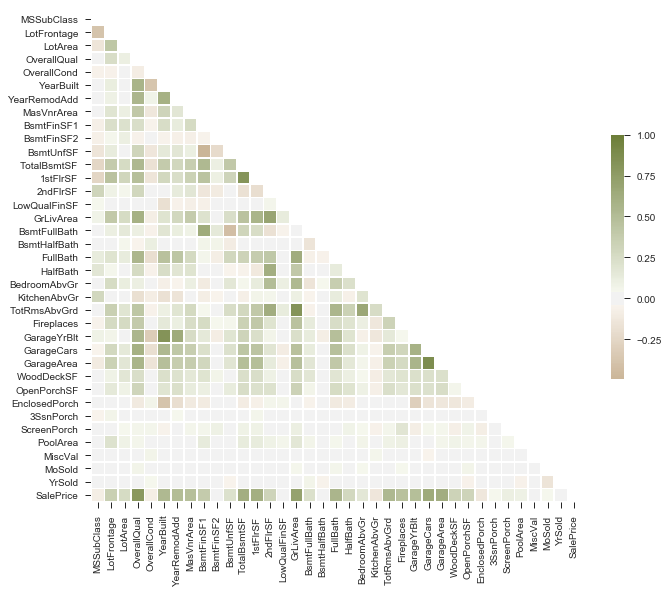

In [522]:
# #create a correlation matrix with all numeric columns: Pearson

# sns.set(style="ticks")

# # take the numerical columns
# data = pd.DataFrame(data= numericdf,
#                  columns=numericdf.columns.tolist())

# # Compute the correlation matrix
# corr = data.corr(method = 'pearson')

# # Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(50, 100, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})




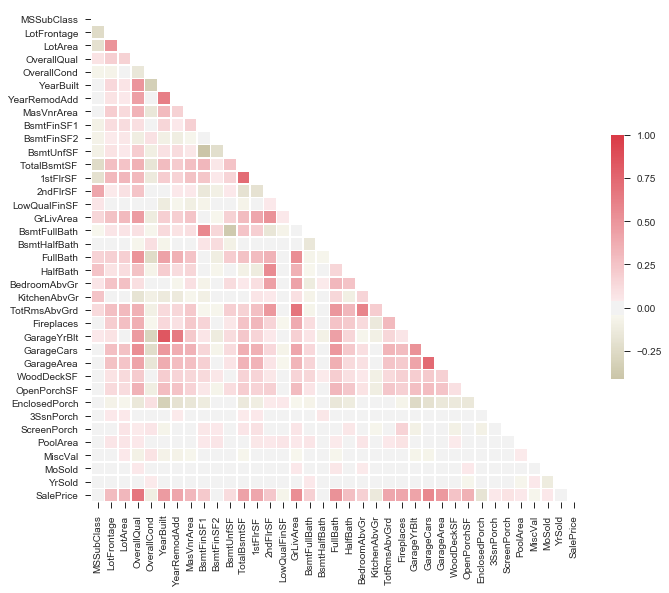

In [530]:
# #Ordinal Variables Correlation Plot: Kendall
# sns.set(style="ticks")

# # take the numerical columns
# data = pd.DataFrame(data= numericdf,
#                  columns=numericdf.columns.tolist())

# # Compute the correlation matrix
# corr = data.corr(method = 'kendall')

# # Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(75, 10, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})



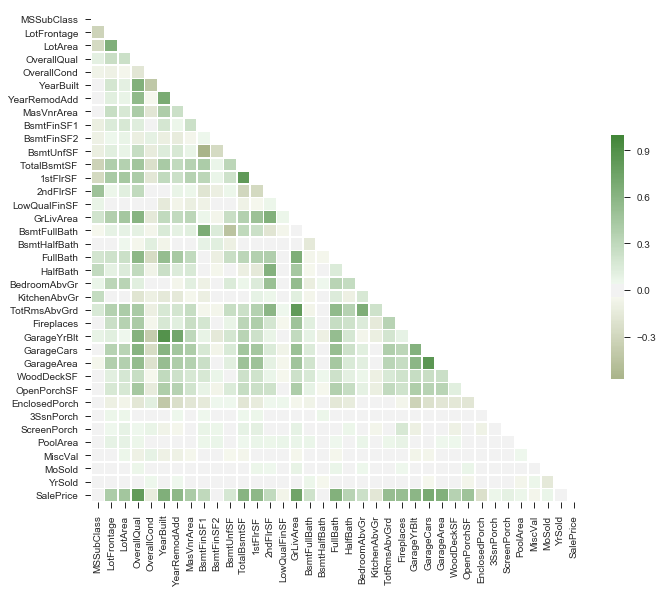

In [531]:
# #Correlation between Ordinal Variables and Sales Prices: Spearman
# sns.set(style="ticks")

# # take the numerical columns
# data = pd.DataFrame(data= numericdf,
#                  columns=numericdf.columns.tolist())

# # Compute the correlation matrix
# corr = data.corr(method = 'spearman')

# # Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(100, 125, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})



In [166]:
# #Boxplot with Median Price and Neighborhoods

# N = len(totalgamecategory)     # Number of boxes

# # generate an array of rainbow colors by fixing the saturation and lightness of the HSL representation of colour 
# # and marching around the hue. 

# c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]

# #loading the data with filters
# data = [{
#     'y': gamedf.starrating[gamedf.gamecategory == j],
#     'name': j,
#     'type':'box',
#     'marker':{'color': c[i]}
#     } for i, j in enumerate(totalgamecategory)]


# # format the layout
# layout = go.Layout(title="Average Rating for Every Game Category",
#                 xaxis=dict(title='Game Category'),
#                 yaxis=dict(title='Average Rating'))


# fig = go.Figure(data=data, layout=layout)

# py.offline.iplot(fig)


## 2.3 Feature Engineering



## 3.1 Modeling: Ridge 

## 3.2 Modeling: Lasso

## 3.3 Modeling: Elastic Net